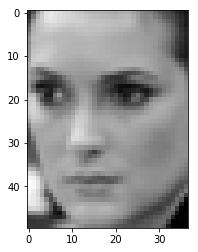

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Tiago Moreira Trocoli da Cunha
# Numero: 226078

# 1) Leia o arquivo X.npy.
X = np.load("X.npy")

# 2) Imprima a imagem.
img = X[0,:].reshape(50,37)
plt.imshow(img,plt.cm.gray)

In [25]:
# 3) Faça a fatoração svd da matriz X usando os dois metodos
U1,D1,V1 = np.linalg.svd(X, full_matrices=True)
U2,D2,V2 = np.linalg.svd(X, full_matrices=False)
(m,n) = X.shape

if U1.shape == (m,m) and D1.shape == (n,) and V1.shape == (n,n):
    print "True"
else:
    print "False"
if U2.shape == (m,n) and D2.shape == (n,) and V2.shape == (n,n):
    print "True"
else:
    print "False"

# transformando o vetor D2 em matrix diagonal com elementos de D2 
D = np.zeros((n,n))
for i in range(0,n):
    D[i,i] = D2[i]
print U2.shape, D2.shape, V2.shape

True
True
(3023, 1850) (1850,) (1850, 1850)


In [12]:
# 4) Verifique o maior valor em modulo da diferença do 2nd metodo, X - (U*D*V^T)
max_err = np.absolute(np.amax(X - np.dot(U2,np.dot(D,V2))))
# Compare esse valor com o valor médio dos dados em X
print max_err, X.mean()

2.703829574102201e-05 129.54884


In [13]:
# 5.1) matriz reduzida, k = 150
k = 150
XD = np.dot(U2[:,0:k],D[0:k,0:k])
# 5.2) matrix reconstruida
XC = np.dot(U2[:,0:k],np.dot(D[0:k,0:k],V2[0:k,:]))
print X.shape

(3023, 1850)


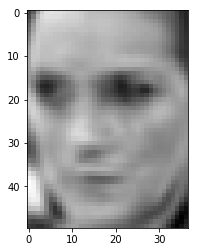

In [116]:
# 6) Imprimir a imagem reconstruida
img = XC[0,:].reshape(50,37)
plt.imshow(img,plt.cm.gray)

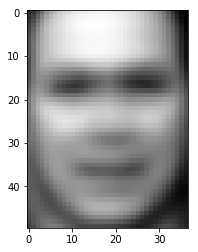

In [28]:
# 7) Use o TruncatedSVD do scikit-learn
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = k)

U = svd.fit_transform(X)
eigenvalues = svd.explained_variance_ratio_
VT = svd.components_

Sigma = np.zeros((k,k))
for i in range(0,k):
    Sigma[i,i] = eigenvalues[i]

# matriz reduzida, k = 150
XD = np.dot(U,Sigma)
# matrix reconstruida
XC = np.dot(U,np.dot(Sigma,VT))
# Imprimir a imagem reconstruida
img = XC[0,:].reshape(50,37)
plt.imshow(img,plt.cm.gray)

In [27]:
# 8) Imprima a primeira, segunda, 50-ésima e 150-ésima base (eigenfaces).

print V2[0:k,:]

[[-0.01482109 -0.01568116 -0.01729576 ... -0.02057458 -0.01954547
  -0.01844866]
 [ 0.0216102   0.02143647  0.0230226  ... -0.04328211 -0.0405992
  -0.03755841]
 [-0.047679   -0.04879177 -0.05002641 ... -0.04085335 -0.03925546
  -0.03599704]
 ...
 [-0.004985   -0.02145993 -0.03894642 ... -0.02005021  0.03729107
   0.01580687]
 [ 0.06194078  0.02756717 -0.0039066  ...  0.02508646  0.00127053
   0.00861379]
 [-0.03826366 -0.03990286 -0.01235724 ... -0.00870327 -0.00207697
   0.01216618]]
